
# Review data analysis and sentiment prediction

Here we are using the data from the amazon reviews, downloaded from http://jmcauley.ucsd.edu/data/amazon/
This site is having data from 1996 - 2014

The file we are using as dataset is  *json*  type file. We have reviewerID, asin, reviewerName, overall, summary columns in data.

We have used clothing data from the mentioned website, initially using *clothing_small.csv * - having 1000 rows and if data doesnt give us expected resuts we used *clothing_20000.csv * set which has 20000 rows.

### Main logic in this code is that if the reviews in amazon are greater than or equal to 3 it is assumed as a postive review and machine is trained to pursue the same, any review less than 3 is assumed as a negative review

steps followed for the classification:

1. Classifiers defining, which will be used in the code. 
2. Data loading from json file, loading strings to arrays.
3. Splitting data into train and test data using sklearn
4. The data which we obtain will be in strings, they need to be vectorised, thus we vectorise the review data.
5. After the initial data modelling has been done now trained the model using four classifying algos as follows:
       
        5.a. Support Vector Machine - Kernel = 'linear'
        5.b. Decision Tree
        5.c. K - Nearest Neighbours
        5.d. Logistic Regressor Classification

6. Verifying the model using r2 and f1 scores and with few examples
7. Improving data by equally distributing the number of positive and negative reviews
8. A development in the results were observed

## Data Class


In [2]:
## Data Class

# Defining a class of sentiment and review before classifying the text in data file.

class sentiment:
    NEGATIVE = "NEGATIVE"
    POSITIVE = "POSITIVE"

import random

class Review:
    def __init__(self, text, score):
        self.text = text
        self.score = score
        self.senti = self.get_senti()
        
    def get_senti(self):
        if self.score < 3:
            return sentiment.NEGATIVE
        else:
            return sentiment.POSITIVE    
        # the function returns positive as sentiment if reviews are 3, 4, 5
        


# Review Container is a class defined to split even number of positive and negative reviews and define functions
# to use for the loading of data into lists we need.

class ReviewContainer:
    def __init__(self, reviews):
        self.reviews = reviews
    
    def get_text(self):
        return [x.text for x in self.reviews]
   
    def get_sentiment(self):
        return [x.senti for x in self.reviews]
    
    
    def evenly_distribute(self):
        negative = list(filter(lambda x: x.senti == sentiment.NEGATIVE, self.reviews))
        positive = list(filter(lambda x: x.senti == sentiment.POSITIVE, self.reviews))
        
        positive_shrunk = positive[:len(negative)] # Shrinking  positive values to length of negative values
        
        
        self.reviews = negative + positive_shrunk
        
        random.shuffle(self.reviews)

## Loading data

In [3]:
# importing json library to read json file

import json
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix



# data = 'Clothing_small.json'
data = 'Clothing_20000.json' 


# After seeing that number of samples are less for negative sentiment we changed the data set using code below

# import json
# import random


# data = []
# file_name = 'Clothing_large.json'
# with open(file_name) as f:
#	 for line in f:
#		 review = json.loads(line)
#		 year = int(review['reviewTime'].split(' ')[-1])
#		 if year == 2014:
#			 data.append(review)

# final_data = random.sample(data, 20000)

# print(len(final_data))

# print(final_data[0:5])

# with open('Clothing_20000.json', 'w') as f:
#	for review in final_data:
#		f.write(json.dumps(review)+'\n')


# above mentioned is used to re-extract data from larget clothing set at http://jmcauley.ucsd.edu/data/amazon/


reviews = []

# writing a function to form a list 'reviews' and storing data into the reviews

with open(data) as f:  
    for line in f:
        review = json.loads(line)
        
        reviews.append(Review(review["reviewText"],review["overall"]))

reviews[11].text

'this is a cloth cardigan and not the most comfortable for wrapping up in. hangs at sides and does not look as good buttoned up as it does open. fits a little tight in the arms. but everywhere else was good.'

## Preparing data

In [4]:
# Creating two lists 'train', 'test' by splitting 'reviews' list using train_test_split model from sk-learn

from sklearn.model_selection import train_test_split


train, test = train_test_split(reviews, test_size = 0.22, random_state = 100)



train_container = ReviewContainer(train)
test_container = ReviewContainer(test)


# we are training the system that reviews which had rating of 3 and
# above are majorly positive and we train words in data set in order to get the sentiment of review

train_container.evenly_distribute()

x_train = train_container.get_text()
y_train = train_container.get_sentiment()


x_test = test_container.get_text()
y_test =  test_container.get_sentiment()


print(y_train.count(sentiment.POSITIVE))
print(y_train.count(sentiment.NEGATIVE))

# here the number of positive and negative reviews is that of same as we used the 'evenly_distribute()' function.

1637
1637


### Vectorisation - numeric notations for word count

In [5]:
print(x_test[1]) 


from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
count_vect = TfidfVectorizer()

# Converting strings of words in to a list of numbers and the number represents their repetetion in that sentence

x_train_vector = count_vect.fit_transform(x_train)
x_test_vector = count_vect.transform(x_test)



## Classification

# This statement seems like a positive statement as the person seems happy about the product
# Ideally we should get sentiment as 'POSITIVE' if the model is classifying properly


This bag has everything I wanted in a bag...cross body, green, and lots of pockets for storage.  It is soft and holds up to everything I can put it through!  I love this bag!


In [6]:
from sklearn import svm

clf_svm = svm.SVC(kernel = 'linear')

clf_svm.fit(x_train_vector, y_train)


clf_svm.predict(x_test_vector[1])

# Support Vector Algo works as we got POSTIVE as sentiment for (x_test[1])


array(['POSITIVE'], dtype='<U8')

## Classification




### Linear SVM

In [7]:
print(x_test[5])

The Injinji toe socks are my husband's and my favorite new socks.  We have bought them in all lengths including crew so my husband can wear them with his dress shoes.


In [8]:
from sklearn import svm

clf_svm = svm.SVC(kernel = 'linear')

clf_svm.fit(x_train_vector, y_train)
# y_pred = clf_svm.predict(x_test)

# print(confusion_matrix(y_test, y_pred))
print(clf_svm.predict(x_test_vector[5]))

['POSITIVE']


### Decision Tree

In [9]:
from sklearn import tree 

clf_dt = tree.DecisionTreeClassifier()


clf_dt.fit(x_train_vector, y_train)



clf_dt.predict(x_test_vector[5])

# Decision Tree algo works as we got POSTIVE as sentiment for (x_test[1])


array(['POSITIVE'], dtype='<U8')

### K- Nearest Neighbours

In [10]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn =  KNeighborsClassifier()

clf_knn.fit(x_train_vector, y_train)



clf_knn.predict(x_test_vector[5])

# K-Nearest Neighbours Algo works as we got POSTIVE as sentiment for (x_test[1])


array(['POSITIVE'], dtype='<U8')

### Logistic Regression

In [11]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression

clf_log =  LogisticRegression()

clf_log.fit(x_train_vector, y_train)


clf_log.predict(x_test_vector[5])

# Logistic Regression classfier algo works as we got POSTIVE as sentiment for (x_test[1])

array(['POSITIVE'], dtype='<U8')

## Evaluation

In [12]:
print(clf_svm.score(x_test_vector, y_test))
print(clf_dt.score(x_test_vector, y_test))
print(clf_knn.score(x_test_vector, y_test))
print(clf_log.score(x_test_vector, y_test))

# Here the accuracy scores are determined for the models ideally a good score should be near to 1.

0.8231818181818182
0.6786363636363636
0.7665909090909091
0.8243181818181818


In [13]:
# Lets verify f1_score as well, where F1 = 2 * (precision * recall) / (precision + recall)

from sklearn.metrics import f1_score

print(
    'Linear Support Vector Machine :',
    f1_score(y_test, clf_svm.predict(x_test_vector), average = None, 
    labels = [sentiment.POSITIVE, sentiment.NEGATIVE])
    )

print(
    'Decision Tree : ',
    f1_score(y_test, clf_dt.predict(x_test_vector), average = None, 
    labels = [sentiment.POSITIVE, sentiment.NEGATIVE])
    )

print(
    'K-Nearest Neighbour : ',
    f1_score(y_test, clf_knn.predict(x_test_vector), average = None, 
    labels = [sentiment.POSITIVE, sentiment.NEGATIVE])
    )

print(
    'Logistic Regression Classification',
    f1_score(y_test, clf_log.predict(x_test_vector), average = None, 
    labels = [sentiment.POSITIVE, sentiment.NEGATIVE])
    )


# since Log Reg and Linear SVM models show better reults of score we use either of the models.

Linear Support Vector Machine : [0.89307312 0.48950131]
Decision Tree :  [0.79218107 0.29158317]
K-Nearest Neighbour :  [0.85598093 0.38466147]
Logistic Regression Classification [0.893658   0.49510124]


In [14]:
# Testing

aneesh_test = ['not at all a good book']

new_test = count_vect.transform(aneesh_test)


print(clf_svm.predict(new_test))
print(clf_log.predict(new_test))

# The results were quite satisfactory, but the f1 score of negative sentiment seems low still.

# reasons could be the number of negative words taht machine assumes could be less number
# and machine couldnt distinguish between 'not good!'' and 'not good' and may have assumed both as two different
# because of '!' mark.

['NEGATIVE']
['NEGATIVE']


In [15]:
##finding prediction probability values for each model
y_pred_svm = clf_svm.decision_function(x_test_vector)
y_pred_dt = clf_dt.predict_proba(x_test_vector)
y_pred_knn = clf_knn.predict_proba(x_test_vector)
y_pred_log = clf_log.decision_function(x_test_vector)

In [16]:
##converting 'Positive' to '1' and 'Negative' to '0'

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

b_test = lb.fit_transform(y_test)

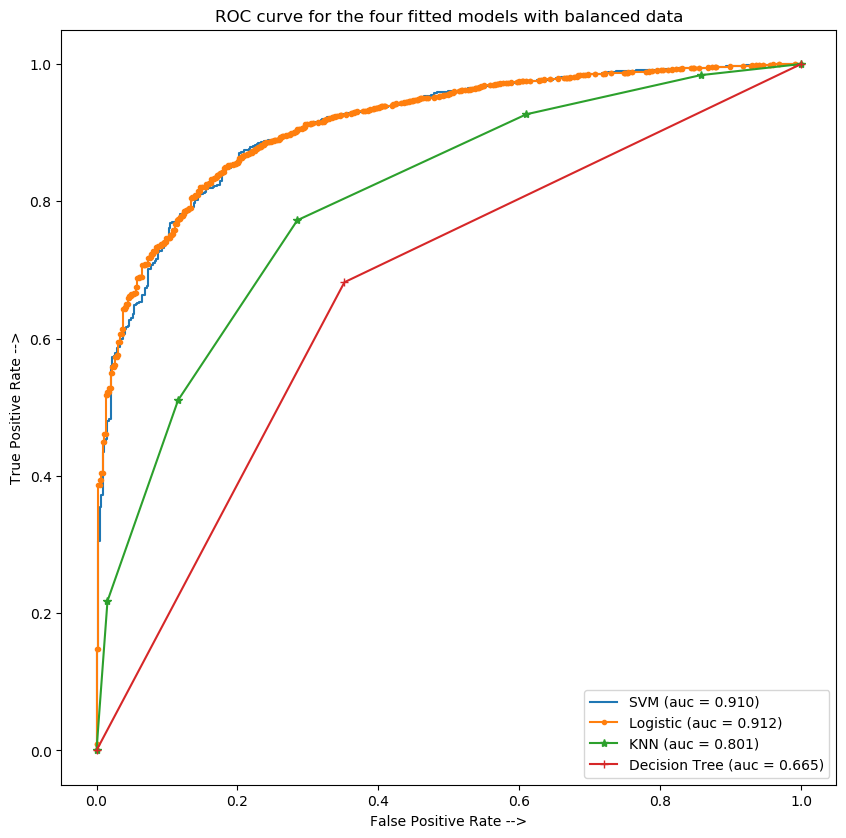

In [17]:
##plotting ROC curve for 4 models

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

logistic_fpr, logistic_tpr, threshold = roc_curve(b_test,y_pred_log)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(b_test,y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

dec_fpr, dec_tpr, threshold = roc_curve(b_test,y_pred_dt[:,1])
auc_dec = auc(dec_fpr, dec_tpr)

knn_fpr, knn_tpr, threshold = roc_curve(b_test,y_pred_knn[:,1])
auc_knn = auc(knn_fpr, knn_tpr)

plt.figure(figsize=(10, 10), dpi=100)
plt.title('ROC curve for the four fitted models with balanced data')
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(knn_fpr, knn_tpr, marker='*', label='KNN (auc = %0.3f)' % auc_knn)
plt.plot(dec_fpr, dec_tpr, marker='+', label='Decision Tree (auc = %0.3f)' % auc_dec)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()